In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels
# import pandas_profiling

from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import time
import requests
import datetime

# import missingno as msno

In [2]:
df_train = pd.read_csv("yellow_tripdata_2016-03.csv")
# df_train.head(5)

In [3]:
df_train.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,1.040395e+00,-7.293679e+01,4.018050e+01,1.340920e+00,1.279508e+01,3.455600e-01,4.976363e-01,1.792582e+00,3.152554e-01,2.997199e-01,1.604582e+01
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,5.807342e-01,8.696974e+00,4.790940e+00,4.902621e-01,1.340979e+02,4.563069e-01,4.863319e-02,2.549124e+00,1.751526e+00,1.230647e-02,1.343578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-3.760000e+02,-5.850000e+01,-1.000000e+00,-2.000000e+01,-1.604000e+01,-3.000000e-01,-3.763000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,1.000000e+00,-7.399125e+01,4.073462e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,1.000000e+00,-7.397961e+01,4.075375e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,1.000000e+00,-7.396228e+01,4.076910e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.776000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,9.900000e+01,0.000000e+00,5.079786e+01,4.000000e+00,4.294967e+05,8.000000e+01,7.930000e+01,8.500000e+02,1.410320e+03,3.000000e-01,4.295622e+05


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [5]:
df_train = df_train.drop(columns=['RatecodeID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
                        'improvement_surcharge', 'total_amount'])

In [6]:
# df_train.describe()
'''Some outliers are observed:
passenger count = 0
trip distance = 1.2 X 10^7 and 0
'''

'Some outliers are observed:\npassenger count = 0\ntrip distance = 1.2 X 10^7 and 0\n'

In [7]:
# df_train.info()

In [8]:
df_train["pickup_datetime"] = pd.to_datetime(df_train["tpep_pickup_datetime"])
df_train["dropoff_datetime"] = pd.to_datetime(df_train["tpep_dropoff_datetime"])

In [9]:
df_train["pickup_dayofweek"] = df_train.pickup_datetime.dt.dayofweek
df_train["pickup_weekday_name"] = df_train.pickup_datetime.dt.weekday_name
df_train["pickup_hour"] = df_train.pickup_datetime.dt.hour
df_train["pickup_month"] = df_train.pickup_datetime.dt.month

In [10]:
df_train.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_dayofweek,pickup_hour,pickup_month
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,12210952.0
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,-7.293679e+01,4.018050e+01,2.972635e+00,1.370101e+01,3.0
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,8.696974e+00,4.790940e+00,1.904211e+00,6.355553e+00,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,-1.616987e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.0
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,-7.399125e+01,4.073462e+01,1.000000e+00,9.000000e+00,3.0
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,-7.397961e+01,4.075375e+01,3.000000e+00,1.400000e+01,3.0
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,-7.396228e+01,4.076910e+01,5.000000e+00,1.900000e+01,3.0
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,0.000000e+00,5.079786e+01,6.000000e+00,2.300000e+01,3.0


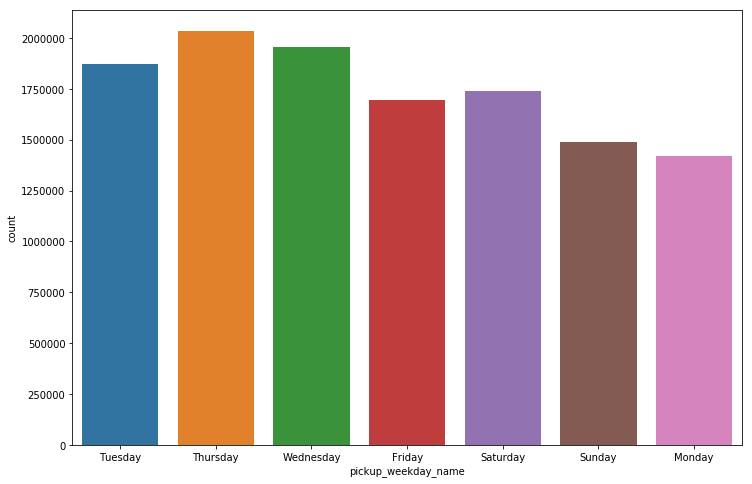

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_weekday_name", data=df_train)
plt.show()

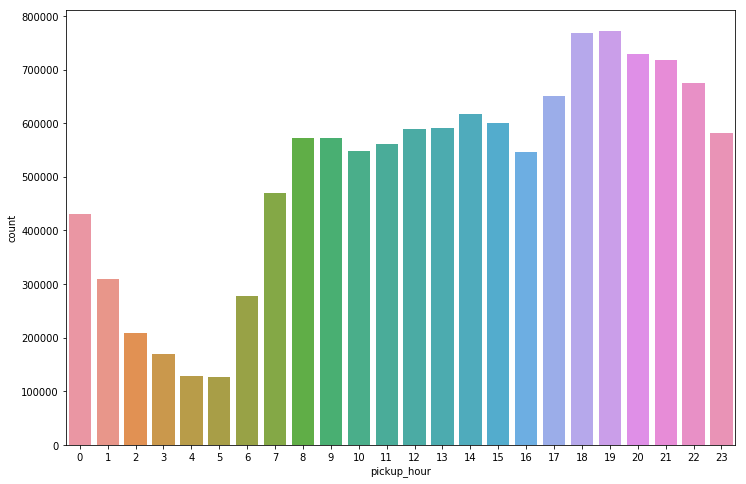

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="pickup_hour", data=df_train)
plt.show()

In [13]:
# df_train.head(5)

In [14]:
df_train["trip_duration"] = (df_train["dropoff_datetime"] - df_train["pickup_datetime"]).dt.seconds
# df_train.head(5)

In [15]:
allLat  = np.array(list(df_train['pickup_latitude'])  + list(df_train['dropoff_latitude']))
allLong = np.array(list(df_train['pickup_longitude']) + list(df_train['dropoff_longitude']))

'''When we plotted the distance travelled using given latitude and longitude, the plot is not like histogram plot but only spikes. 
The reason for it is presence of outliers. Plot was centered around 0 for both longitude and latitude. Due to some long distance
trips, spike like graph was observed. For better visualization, threshold is set for lat-long. Percentile function is used 
to achieve for same. Lat-long is converted to km and then desired histogram is observed'''

longLimits = [np.percentile(allLong, 0.3), np.percentile(allLong, 98.0)]
latLimits  = [np.percentile(allLat , 2), np.percentile(allLat , 99.7)]
durLimits  = [np.percentile(df_train['trip_duration'], 0.4), np.percentile(df_train['trip_duration'], 99.7)]

df_train = df_train[(df_train['pickup_latitude']   >= latLimits[0] ) & (df_train['pickup_latitude']   <= latLimits[1]) ]
df_train = df_train[(df_train['dropoff_latitude']  >= latLimits[0] ) & (df_train['dropoff_latitude']  <= latLimits[1]) ]
df_train = df_train[(df_train['pickup_longitude']  >= longLimits[0]) & (df_train['pickup_longitude']  <= longLimits[1])]
df_train = df_train[(df_train['dropoff_longitude'] >= longLimits[0]) & (df_train['dropoff_longitude'] <= longLimits[1])]
df_train = df_train[(df_train['trip_duration']     >= durLimits[0] ) & (df_train['trip_duration']     <= durLimits[1]) ]
df_train = df_train.reset_index(drop=True)

allLat  = np.array(list(df_train['pickup_latitude'])  + list(df_train['dropoff_latitude']))
allLong = np.array(list(df_train['pickup_longitude']) + list(df_train['dropoff_longitude']))

# convert fields to sensible units
medianLat  = np.percentile(allLat,50)
medianLong = np.percentile(allLong,50)

latMultiplier  = 111.32        # km per degree longitude
longMultiplier = np.cos(medianLat*(np.pi/180.0)) * 111.32        # km per degree latitude

df_train['duration [min]'] = df_train['trip_duration']/60.0
df_train['src lat [km]']   = latMultiplier  * (df_train['pickup_latitude']   - medianLat)
df_train['src long [km]']  = longMultiplier * (df_train['pickup_longitude']  - medianLong)
df_train['dst lat [km]']   = latMultiplier  * (df_train['dropoff_latitude']  - medianLat)
df_train['dst long [km]']  = longMultiplier * (df_train['dropoff_longitude'] - medianLong)

allLat  = np.array(list(df_train['src lat [km]'])  + list(df_train['dst lat [km]']))
allLong = np.array(list(df_train['src long [km]']) + list(df_train['dst long [km]']))

In [16]:
# df_train['dropoff_longitude'].describe()
print(longLimits)
print(latLimits)
# a = np.array([10, 7, 4])
# print(np.percentile(a, 0.3))

[-74.0171890258789, -73.78192901611328]
[40.643909454345696, 40.851872600555424]


In [17]:
print("minLat: " + str(min(allLat)))
print("minLong: " + str(min(allLong)))
print("maxLat: " + str(max(allLat)))
print("maxLong: " + str(max(allLong)))

minLat: -12.31788345336993
minLong: -3.0321508491658817
maxLat: 10.832450408936337
maxLong: 16.806466503874457


Text(0.5,0,'longitude [km]')

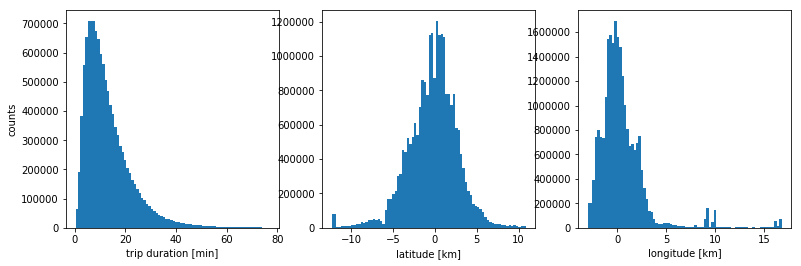

In [18]:
# make sure the ranges we chose are sensible
fig, axArray = plt.subplots(nrows=1,ncols=3,figsize=(13,4))
axArray[0].hist(df_train['duration [min]'],80); 
axArray[0].set_xlabel('trip duration [min]'); axArray[0].set_ylabel('counts')
axArray[1].hist(allLat ,80); axArray[1].set_xlabel('latitude [km]')
axArray[2].hist(allLong,80); axArray[2].set_xlabel('longitude [km]')

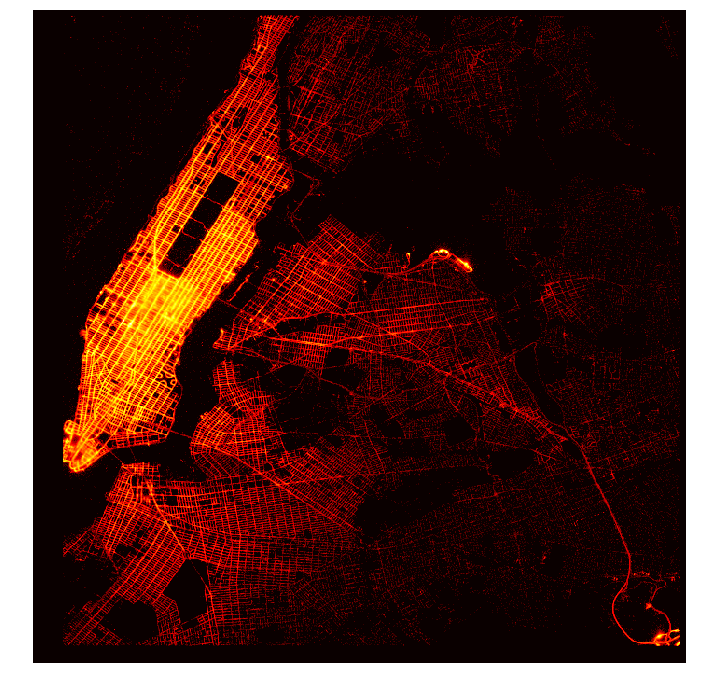

In [19]:
imageSize = (700,700)
longRange = [-4,17]
latRange = [-13,11]

allLatInds  = imageSize[0] - (imageSize[0] * (allLat  - latRange[0])  / (latRange[1]  - latRange[0]) ).astype(int)
allLongInds =                (imageSize[1] * (allLong - longRange[0]) / (longRange[1] - longRange[0])).astype(int)

# print(max(allLatInds))

locationDensityImage = np.zeros(imageSize)
for latInd, longInd in zip(allLatInds,allLongInds):
    locationDensityImage[latInd,longInd] += 1

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
ax.imshow(np.log(locationDensityImage+1),cmap='hot')
ax.set_axis_off()

Plot spatial density plot of the pickup and dropoff locations. Manhatten looks a little bit of what you might expect to see from space.

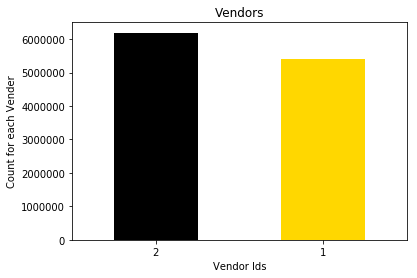

In [20]:
df_train["VendorID"].value_counts().plot(kind='bar',color=["black","gold"])
plt.xticks(rotation='horizontal')
plt.title("Vendors")
plt.ylabel("Count for each Vender")
plt.xlabel("Vendor Ids");

Different vendors. Vendor 2 has better drivers

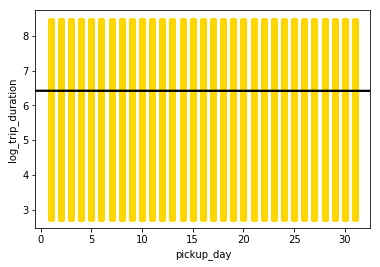

In [21]:
df_train['pickup_day'] = df_train['pickup_datetime'].dt.day
df_train['log_trip_duration'] = np.log1p(df_train['trip_duration'].values)
sns.regplot(df_train.pickup_day, df_train.log_trip_duration,
            color='gold', line_kws={'color':'black'});

Median of trip duration is 6.40 and solid black line gives linear regression model fit

C:\Users\prita\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prita\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


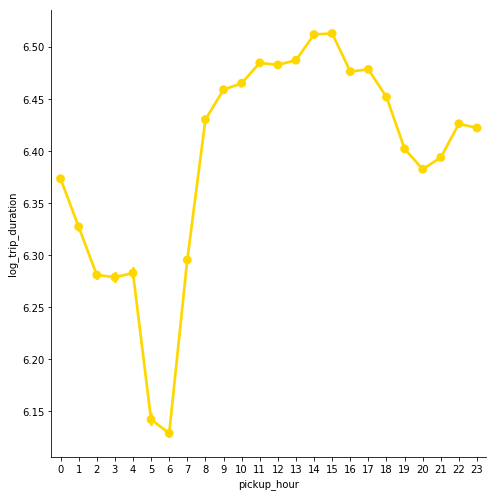

In [22]:
sns.factorplot(x="pickup_hour", y="log_trip_duration", data=df_train,
               color='gold',size=7);

1. Least trip duaration is in early mornings and past midnight.
2. Traffic increases from 7AM due to offices and remains high till 3 PM
3. Then traffic decreases till 8PM and then again hikes till 11 PM maybe due to people going home after work 

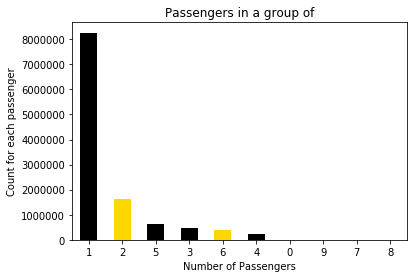

In [23]:
df_train["passenger_count"].value_counts().plot(kind='bar',color=["black","gold"])
plt.title("Passengers in a group of")
plt.xticks(rotation='horizontal')
plt.ylabel("Count for each passenger")
plt.xlabel("Number of Passengers");

1. Generally people book taxi for one person (themselves)
2. Then with a friend (2 people)
3. Then maybe family trip (5 people)
4. There are trips with 0 (maybe ghost), 7, 8, and 9 passengers which can 
   be considered as outliers